In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

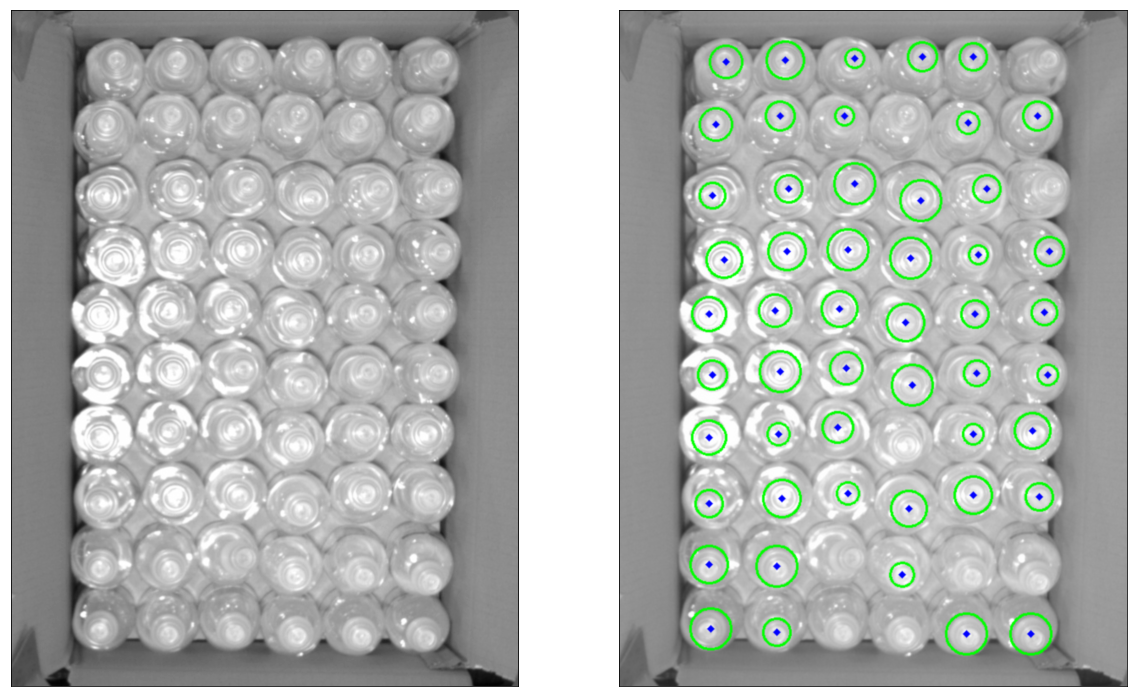

In [122]:
img = cv2.imread('../dataset/img/2 (244)_resize.jpg', 0)
equ_img = cv2.equalizeHist(img)
gau_img = cv2.GaussianBlur(equ_img, (5, 5), 0)
lap_img = cv2.Laplacian(gau_img, -1, ksize=5)
pre_img = cv2.medianBlur(lap_img, 5)
circles = cv2.HoughCircles(pre_img, cv2.HOUGH_GRADIENT, 1, 50, param1=100,
                            param2=35, minRadius=10, maxRadius=25)
radiuses = np.minimum(circles[0, :, -1] + 5, 30.0)
#print(radiuses)
circles = np.uint16(np.around(circles))
cir_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for i in circles[0, :]:
    # draw the outer circle
    cv2.circle(cir_img, (i[0],i[1]), i[2], (0,255,0), 2)
    # draw the center of the circle
    cv2.circle(cir_img, (i[0],i[1]), 2, (0,0,255), 3)

fig, ax = plt.subplots(1, 2, figsize=(20, 30), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(img, cmap='gray', interpolation='bicubic')
#ax[0,1].imshow(equ_img, cmap='gray', interpolation='bicubic')
#ax[0,2].imshow(gau_img, cmap='gray', interpolation='bicubic')
#ax[1,0].imshow(lap_img, cmap='gray', interpolation='bicubic')
#ax[1,1].imshow(pre_img, cmap='gray', interpolation='bicubic')
ax[1].imshow(cir_img, interpolation='bicubic')
plt.show()